In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('lenta-ru-news.csv')


In [3]:
df = df[['title', 'text', 'topic', 'tags']]

In [4]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-4-ead08ed5eb25>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [5]:
df

,title,text,topic,tags
0,Названы регионы России с самой высокой смертностью от рака,"Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онкологические заболевания становились причиной смерти в Псковской, Тверской, Тульской и Орловской областях, а также в Севастополе. Вице-премьер напомнила, что главные факторы смертности в России — рак и болезни системы кровообращения. В начале года стало известно, что смертность от онкологических заболеваний среди россиян снизилась впервые за три года. По данным Росстата, в 2017 году от рака умерли 289 тысяч человек. Это на 3,5 процента меньше, чем годом ранее.",Россия,Общество
1,Австрия не представила доказательств вины российских биатлонистов,"Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уполномоченного адвоката дипмиссии с представителями прокуратуры страны, передает ТАСС. «Действует презумпция невиновности. Каких-либо ограничений свободы передвижения для команды нет», — добавили в посольстве. Международный союз биатлонистов (IBU) также не будет применять санкции к российским биатлонистам. Все они продолжат выступление на Кубке мира. Полиция нагрянула в отель сборной России в Хохфильцене вечером 12 декабря. Как написал биатлонист Александр Логинов, их считают виновными в махинациях с переливанием крови. Биатлонисту Антону Шипулину, также попавшему в список, полиция нанесла отдельный визит: сейчас он тренируется отдельно в австрийском Обертиллахе. Обвинения спортсмен назвал бредом, а также указал на «охоту на ведьм» в мировом биатлоне. В Австрии прием допинга — уголовное преступление. Максимальное наказание за его употребление — три года тюрьмы.",Спорт,Зимние виды
2,Обнаружено самое счастливое место на планете,"Сотрудники социальной сети Instagram проанализировали поставленные пользователями смайлики, геолокации и хештеги и опубликовали итоги 2018 года. Об этом сообщается на официальном сайте Instagram. Таким образом, самой счастливой геолокацией Instagram признал Диснейленд в Токио, так как больше всего счастливых смайликов в 2018 году пользователи ставили именно под фотографиями из японского Диснейленда. Также эксперты назвали самый популярный фильтр для лица: им стал фильтр с сердечками на глазах. А, например, самыми часто используемыми хештегами в 2018 году были #metoo, #timesup и #marchforourlives. В ноябре сотрудники британской ассоциации потребителей Which? составили рейтинг самых безопасных стран для путешествий. Специалисты проанализировали 20 самых популярных туристических направлений по четырем критериям: уровень преступности, угроза здоровью, вероятность теракта и стихийных бедствий. Самой безопасной страной по всем параметрам стала Исландия.",Путешествия,Мир
3,В США раскрыли сумму расходов на расследование «российского дела»,"С начала расследования российского вмешательства в выборы власти США потратили более 25 миллионов долларов. Об этом сообщает Associated Press со ссылкой на отчет Министерства юстиции США. В документе содержатся данные о расходах на следствие с апреля по сентябрь 2018 года. За эти полгода было потрачено 4,6 миллиона долларов, из которых почти 3 миллиона долларов ушли на зарплату сотрудников, 580 тысяч — на поездки и сопутствующие расходы. Ранее Минюст США уже публиковал отчеты о затратах на дело о российском вмешательстве за предыдущие месяцы. 11 декабря расследование спецпрокурора Робера Мюллера показало, что по меньшей мере 14 человек из окружения президента США Дональда Трампа контактировали с россиянами во время его избирательной кампании и последующего переходного периода перед вступлением в должность главы государства. Мюллер с 2017 года ведет дело о якобы российском вмешательстве в американские выборы в 2016-м. Перед ним поставлена задача выяснить, был ли сгов

In [6]:
df.tags.value_counts()

Все              453763
Политика         33220 
Общество         27560 
Украина          17934 
Происшествия     15972 
                 ...   
Страноведение    21    
Выборы           11    
Мировой опыт     6     
Вооружение       3     
Инновации        1     
Name: tags, Length: 88, dtype: int64

In [7]:
df.topic.value_counts()

Россия               160519
Мир                  136680
Экономика            79538 
Спорт                64421 
Культура             53803 
Бывший СССР          53402 
Наука и техника      53136 
Интернет и СМИ       44675 
Из жизни             27611 
Дом                  21734 
Силовые структуры    19596 
Ценности             7766  
Бизнес               7399  
Путешествия          6408  
69-я параллель       1268  
Крым                 666   
Культпросвет         340   
Легпром              114   
Библиотека           65    
Оружие               3     
ЧМ-2014              2     
МедНовости           1     
Сочи                 1     
Name: topic, dtype: int64

In [8]:
topics = df.topic.value_counts()
topics = topics[0:-9].index.to_list()

In [9]:
import re
import numpy as np
from nltk.corpus import stopwords
from tqdm.notebook import tqdm
from multiprocessing import Pool
from pymystem3 import Mystem

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Андрей\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [12]:
words_regex = re.compile('\w+')

def find_words(text, regex = words_regex):
    tokens =  regex.findall(text.lower())
    return [w for w in tokens if w.isalpha() and len(w) >= 3]


stopwords_list = stopwords.words('russian')
stopwords_list.extend(['год', 'это', 'свой', 'весь', 'все','the','который','также','стать'])

def lemmatize(words, lemmer = morph, stopwords = stopwords_list):
    lemmas = [lemmer.parse(w)[0].normal_form for w in words]
    return [w for w in lemmas if not w in stopwords 
            and w.isalpha()]

def preprocess(text):
    return (lemmatize(find_words(text)))

In [13]:
df = df.sample(10000)
df.topic.value_counts()

Россия               2154
Мир                  1822
Экономика            1065
Спорт                887 
Наука и техника      744 
Бывший СССР          729 
Культура             718 
Интернет и СМИ       609 
Из жизни             394 
Дом                  303 
Силовые структуры    242 
Ценности             110 
Бизнес               90  
Путешествия          86  
69-я параллель       26  
Крым                 11  
Культпросвет         4   
Легпром              2   
Name: topic, dtype: int64

In [14]:
N= len(df)

In [15]:
preprocessed_text = list(tqdm(map(preprocess, df['text'][:N]), total=N))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [16]:
len(preprocessed_text)

10000

In [17]:
df['text'] = preprocessed_text
df.sample(3)

,title,text,topic,tags
444403,Google полностью переделает свою файловую систему,"[google, рамка, проект, caffeine, включать, оптимизация, инфраструктура, поисковик, полностью, переделать, файловый, система, google, file, system, gfs, писать, register, ссылка, сотрудник, google, шон, квинлан, sean, quinlan, google, file, system, разработать, конец, девяностый, прошлое, век, создатель, предполагать, нагрузка, предстоять, выдерживать, последующий, кроме, gfs, оптимизировать, пакетный, обработка, данные, google, первый, очередь, необходимо, сохранять, индексировать, получить, поисковый, робот, информация, спецификация, gfs, прямо, написать, время, отклик, запрос, менее, важно, обеспечение, высокий, пропускной, способность, современный, приложение, google, gmail, youtube, напротив, требовать, быстрый, отклик, действие, пользователь, gfs, состоять, главное, узел, блочный, сервер, master, node, chunkservers, соответственно, главный, узел, раздавать, запрос, сервер, возвращать, блок, данные, недостаток, система, являться, ...]",Интернет и СМИ,Все
425871,В Калуге за год построили только 15 домов,"[калуга, сдать, эксплуатация, многоквартирный, дом, общий, площадь, тысяча, квадратный, метр, сообщить, портал, regions, ссылка, пресс, служба, администрация, губернатор, калужский, область, власть, объяснять, сокращение, объём, строительство, финансовый, трудность, возникнуть, время, кризис, предполагаться, следующий, объём, ввод, жильё, областной, центр, увеличиться, незначительно, запланировать, сдача, дом, общий, площадь, тысяча, квадратный, метр, начало, генеральный, директор, российский, союз, строитель, россия, михаил, викторов, заявлять, кризис, оказаться, заморозить, четверть, стройка, россия, сложность, привлечение, финансирование, процент, региональный, застройщик, вынудить, либо, заморозить, проект, либо, перенести, срок, сдача, поздний, срок, данные, процент, строительный, проект, заморозить, стадия, близкий, завершение, викторов, отмечать, сложиться, условие, основный, активность, рынок, переместиться, сторона, региональный, девелопер, среднее, размер, ...]",Дом,Все
101293,Десятки авиарейсов отменили и задержали в Москве,"[московский, аэропорт, вторник, декабрь, отменить, задержать, общий, сложность, рейс, информация, опубликовать, портал, яндекс, расписание, момент, написание, заметка, шереметьево, аннулировать, рейс, вылет, откладываться, домодедово, отменить, рейс, задержать, ещё, десять, данные, сбой, расписание, внуково, жуковский, прогноз, гидрометцентр, россия, москва, декабрь, день, ожидаться, нуль, градус, тепло, возможный, дождь, мокрый, снег, среда, декабрь, столичный, аэропорт, отменить, задержать, рейс, ранее, месяц, московский, воздушный, гавань, аннулировать, вылет]",Путешествия,Происшествия


In [18]:
import gensim.models as gs_model
from gensim import corpora

C:\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [19]:
dictionary = corpora.Dictionary(df['text'])

dictionary.filter_extremes(no_below = 5, no_above = 0.95) # игнорируем слова, которые встречаются реже 10 раз или составляют более 0.9 словаря 
dictionary.save('lenta.dict')

In [20]:
corpus = [dictionary.doc2bow(text) for text in df['text']]
corpora.MmCorpus.serialize('lenta.model', corpus) 

In [21]:
%time lda = gs_model.LdaModel(corpus, id2word=dictionary, num_topics=10, chunksize=50, update_every=1, passes=2)

Wall time: 10 s


In [22]:
lda.show_topics(num_topics=10, num_words=10, formatted=True)

[(0,
  '0.022*"россия" + 0.013*"президент" + 0.010*"российский" + 0.010*"заявить" + 0.009*"глава" + 0.008*"страна" + 0.007*"украина" + 0.006*"министр" + 0.006*"москва" + 0.006*"слово"'),
 (1,
  '0.018*"человек" + 0.012*"сообщать" + 0.011*"город" + 0.010*"находиться" + 0.010*"произойти" + 0.009*"время" + 0.009*"сотрудник" + 0.009*"результат" + 0.008*"район" + 0.008*"полиция"'),
 (2,
  '0.024*"дело" + 0.023*"суд" + 0.010*"уголовный" + 0.008*"директор" + 0.008*"обвинение" + 0.007*"статья" + 0.007*"убийство" + 0.007*"признать" + 0.007*"прокуратура" + 0.006*"бывший"'),
 (3,
  '0.047*"компания" + 0.030*"миллион" + 0.027*"доллар" + 0.027*"рубль" + 0.024*"тысяча" + 0.022*"миллиард" + 0.011*"банк" + 0.010*"составить" + 0.010*"метр" + 0.010*"стоимость"'),
 (4,
  '0.013*"новый" + 0.009*"фильм" + 0.008*"работа" + 0.007*"первый" + 0.007*"интернет" + 0.007*"сайт" + 0.006*"учёный" + 0.006*"время" + 0.006*"игра" + 0.005*"мочь"'),
 (5,
  '0.056*"процент" + 0.012*"цена" + 0.012*"уровень" + 0.012*"нефть"

In [23]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%time vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

Wall time: 4.41 s


In [24]:
print(lda.log_perplexity(corpus))


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-8.638707364764919


In [25]:
print('Персплексия: ', np.exp(lda.log_perplexity(corpus)))

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Персплексия:  0.00017711599145886137


In [26]:
coherence_model_lda = gs_model.CoherenceModel(model=lda, texts=df['text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Средняя когерентность: ', coherence_lda)

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Средняя когерентность:  0.49191607942093407


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/5 [00:00<?, ?it/s]

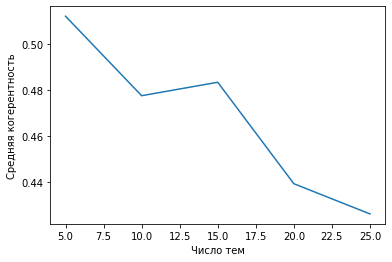

In [28]:
topics_list = [5, 10, 15, 20, 25]
coherences = []

for num in tqdm(topics_list):
    lda = gs_model.LdaModel(corpus, id2word=dictionary, num_topics=num, chunksize=50, update_every=1, passes=2)
    coherences.append(gs_model.CoherenceModel(model=lda, texts=df['text'], dictionary=dictionary, coherence='c_v').get_coherence())

plt.plot(topics_list, coherences)
plt.xlabel("Число тем")
plt.ylabel("Средняя когерентность")
plt.show()